## Scan with schedule file

Testing ways to simulate scanning from the Atacama desert using a schedule file

In [1]:
import os, pickle, time
import numpy as np
import healpy as hp
from beamconv import ScanStrategy, tools
import matplotlib.pyplot as plt
import qpoint as qp
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def get_cls(fname='../ancillary/wmap7_r0p03_lensed_uK_ext.txt'):
    cls = np.loadtxt(fname, unpack=True) # Cl in uK^2
    return cls[0], cls[1:]

In [3]:
# Load up alm                                                                            
lmax = 700
ell, cls = get_cls()
np.random.seed(39)
alm = hp.synalm(cls, lmax=lmax, new=True, verbose=True) # uK  

In [14]:
nsamp      = 1000
mmax       = 5
fwhm       = 30.
scan_speed = 2.8

beam_opts = dict(lmax=800,
                 fwhm=fwhm,       # Gaussian co-pol beam, so only specify FWHM (arcmin)
                 btype='Gaussian')

soscan = ScanStrategy(duration=nsamp,
                  sample_rate=10.21,
                  location='atacama')

soscan.create_focal_plane(nrow=1, ncol=1, fov=1, 
                      **beam_opts)

soscan.allocate_maps(nside=256)

scan_opts = dict(                 
                 scan_speed=scan_speed,
                 ctime_func=soscan.schedule_ctime,
                 q_bore_func=soscan.schedule_scan)

ctime0 = [1510000000]
soscan.ctime_starts = ctime0
soscan.az0s = np.array([214.98])
soscan.az1s = np.array([250.28])
soscan.els = np.array([53.09])
soscan.t0s = np.array([58484.000694])
soscan.t1s = np.array([58484.055556])

soscan.ctime = soscan.schedule_ctime(start=0, end=nsamp, cidx=0)

az, el, lon, lat, qbore = soscan.schedule_scan(return_all=True)

ra, dec, _ = sat.quat2radecpa(qbore)

StopIteration: 

In [4]:
# init scan strategy and instrument                                                      
nsamp      = 10000
mmax       = 5
fwhm       = 30.
scan_speed = 2.8

beam_opts = dict(lmax=800,
                 fwhm=fwhm,       # Gaussian co-pol beam, so only specify FWHM (arcmin)
                 btype='Gaussian')

soscan = ScanStrategy(duration=nsamp,
                  sample_rate=10.21,
                  location='atacama')

soscan.create_focal_plane(nrow=2, ncol=2, fov=3, 
                      **beam_opts)

soscan.allocate_maps(nside=256)

scan_opts = dict(                 
                 scan_speed=scan_speed,
                 ctime_func=soscan.schedule_ctime,
                 q_bore_func=soscan.schedule_scan)

chunks = soscan.partition_schedule_file(filename='', 
    chunksize=0.5*soscan.mlen*soscan.fsamp) 

In [5]:
# Generate timestreams with Gaussian beams
soscan.scan_instrument_mpi(alm, **scan_opts)

maps, cond = soscan.solve_for_map()

Scanning with 8 detectors
[rank 000]: working on: r000c000A, r000c000B
[rank 000]:	Working on chunk 000: samples 0-48396


/Users/jon/.local/lib/python3.6/site-packages/beamconv-0.1-py3.6.egg/beamconv/instrument.py:2221: RuntimeWarning: Keeping el0 at 45.0 for part of scan
  RuntimeWarning)


[rank 000]:	Working on chunk 001: samples 48396-96792
[rank 000]:	Working on chunk 002: samples 96792-145188
[rank 000]:	Working on chunk 003: samples 145188-210736
[rank 000]:	Working on chunk 004: samples 210736-258519
[rank 000]:	Working on chunk 005: samples 258519-306302
[rank 000]: working on: r001c000A, r001c000B
[rank 000]:	Working on chunk 000: samples 0-48396
[rank 000]:	Working on chunk 001: samples 48396-96792
[rank 000]:	Working on chunk 002: samples 96792-145188
[rank 000]:	Working on chunk 003: samples 145188-210736
[rank 000]:	Working on chunk 004: samples 210736-258519
[rank 000]:	Working on chunk 005: samples 258519-306302
[rank 000]: working on: r000c001A, r000c001B
[rank 000]:	Working on chunk 000: samples 0-48396
[rank 000]:	Working on chunk 001: samples 48396-96792
[rank 000]:	Working on chunk 002: samples 96792-145188
[rank 000]:	Working on chunk 003: samples 145188-210736
[rank 000]:	Working on chunk 004: samples 210736-258519
[rank 000]:	Working on chunk 005: s

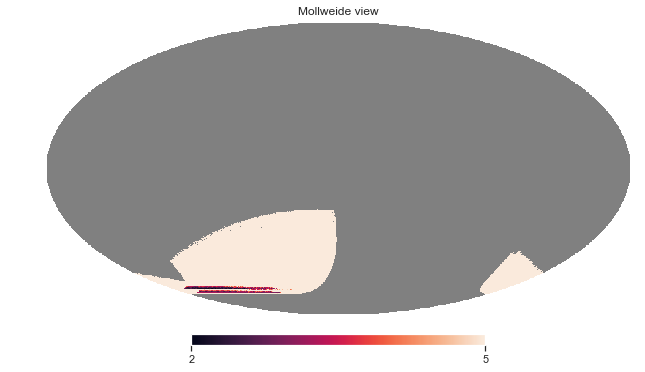

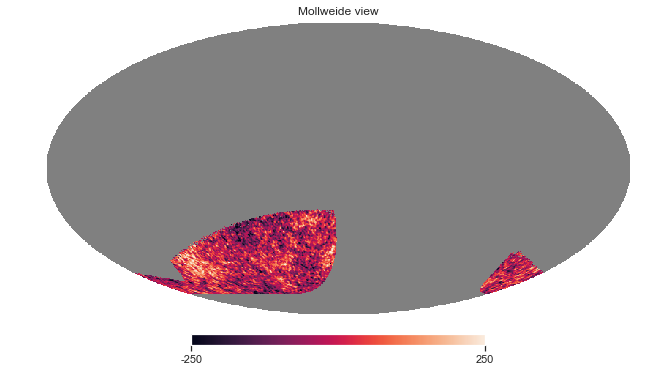

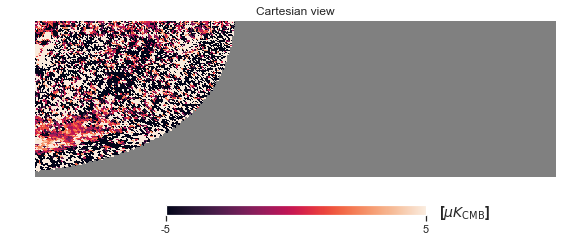

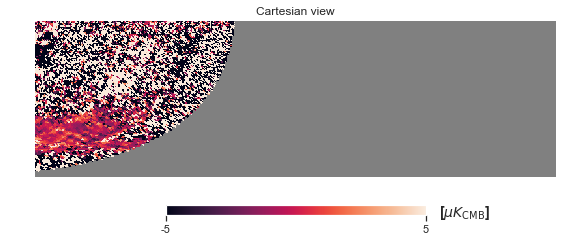

In [6]:
cond[cond == np.inf] = hp.UNSEEN
cart_opts = dict(unit=r'[$\mu K_{\mathrm{CMB}}$]', lonra=[-60, 40], latra=[-70, -40])
hp.mollview(cond, min=2, max=5)
hp.mollview(maps[0], min=-250, max=250)
hp.cartview(maps[1], min=-5, max=5, **cart_opts)
hp.cartview(maps[2], min=-5, max=5, **cart_opts)